In [2]:
#import libraries

import pyreadr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import os

In [3]:
#set working directory 
path = "/Users/dangngochuy/Desktop/Hertie/Hertie 3rd semester/Machine Learning/Predicting-German-Election/Code/Transformed Data"
os.chdir(path)

#load data
#load data
afd = pd.read_csv("combined_data_afd.csv", index_col='date', parse_dates=True)
cdu = pd.read_csv("combined_data_cdu.csv", index_col='date', parse_dates=True)
fdp = pd.read_csv("combined_data_fdp.csv", index_col='date', parse_dates=True)
spd = pd.read_csv("combined_data_spd.csv", index_col='date', parse_dates=True)
lin = pd.read_csv("combined_data_lin.csv", index_col='date', parse_dates=True)
gru = pd.read_csv("combined_data_gru.csv", index_col='date', parse_dates=True)
oth = pd.read_csv("combined_data_oth.csv", index_col='date', parse_dates=True)

### Feature Engineering for Machine Learning Model

In [4]:
#import libraries 

import talib
import numpy as np
from sklearn.metrics import mean_squared_log_error
from sklearn.ensemble import RandomForestRegressor

### AFD

In [38]:
# Create 3-day % changes of support for the current day, and 3 days in the future

afd['3d_future'] = afd['support'].shift(-3)
afd['3d_future_pct'] = afd['3d_future'].pct_change(3)
afd['3d_pct'] = afd['support'].pct_change(3)
afd['3d_past'] = afd['support'].shift(3)

In [39]:
#look at the new dataframe

afd.head(10)

,support,3d_future,3d_future_pct,3d_pct,ma3,ma5,ma10,ma20,ma30,ma50,ma100,ma200,3d_past
date,,,,,,,,,,,,,
2014-05-10,5.134684,5.297950,NaN,NaN,0.992394,0.986829,0.987646,0.992200,1.004681,1.004153,0.964205,0.926529,NaN
2014-05-11,5.175501,5.347033,NaN,NaN,0.992114,0.984840,0.980879,0.984521,0.996130,0.997223,0.958360,0.919348,NaN
2014-05-12,5.236725,5.375088,NaN,NaN,0.989608,0.981496,0.972041,0.974208,0.984146,0.986693,0.948918,0.908776,NaN
2014-05-13,5.297950,5.403143,0.019855,0.031797,0.988444,0.979199,0.965008,0.965172,0.972718,0.976556,0.939719,0.898501,5.134684
2014-05-14,5.347033,5.429412,0.015406,0.033143,0.990064,0.979679,0.961669,0.958856,0.963936,0.968948,0.932845,0.890531,5.175501
2014-05-15,5.375088,5.455681,0.014994,0.026422,0.993476,0.983511,0.963102,0.956526,0.959096,0.965264,0.929719,0.886195,5.236725
2014-05-16,5.403143,5.461542,0.010808,0.019855,0.994808,0.986831,0.965089,0.954363,0.954607,0.961567,0.926626,0.881938,5.297950
2014-05-17,5.429412,5.497165,0.012479,0.015406,0.995052,0.989154,0.967909,0.952662,0.950815,0.958164,0.923866,0.878047,5.347033
2014-05-18,5.455681,5.532788,0.014133,0.014994,0.995185,0.990174,0.970531,0.950916,0.947393,0.954836,0.921173,0.874225,5.375088


In [40]:
# Calculate the correlation matrix between the 3d close pecentage changes (current and future)

corr = afd[['3d_pct', '3d_future_pct']].corr()
print(corr)

                 3d_pct  3d_future_pct
3d_pct         1.000000       0.837014
3d_future_pct  0.837014       1.000000


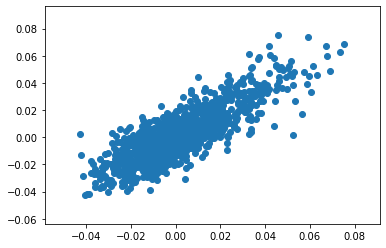

In [41]:
# Scatter the current 3-day percent change vs the future 3-day percent change
plt.scatter(afd['3d_pct'], afd['3d_future_pct'])
plt.show()

In [43]:
feature_names = ['3d_future_pct', '3d_past']  # a list of the feature names for later

# Create moving averages timeperiods of 3, 5, 10, 20, 30, 50, 100 and 200
for n in [3, 5, 10, 20, 30, 50, 100, 200]:

    # Create the moving average indicator and divide by support
    afd['ma' + str(n)] = talib.SMA(afd['support'].values,
                              timeperiod=n) / afd['support']
    # Create the RSI indicator
    #df_2017_allen_afd['rsi' + str(n)] = talib.RSI(df_2017_allen_afd['support'].values, timeperiod=n)
    
    # Add rsi and moving average to the feature name list
    feature_names = feature_names + ['ma' + str(n)]
print(feature_names)

['3d_future_pct', '3d_past', 'ma3', 'ma5', 'ma10', 'ma20', 'ma30', 'ma50', 'ma100', 'ma200']


In [44]:
afd.head(10)

,support,3d_future,3d_future_pct,3d_pct,ma3,ma5,ma10,ma20,ma30,ma50,ma100,ma200,3d_past
date,,,,,,,,,,,,,
2014-05-10,5.134684,5.297950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-05-11,5.175501,5.347033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-05-12,5.236725,5.375088,NaN,NaN,0.989608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-05-13,5.297950,5.403143,0.019855,0.031797,0.988444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.134684
2014-05-14,5.347033,5.429412,0.015406,0.033143,0.990064,0.979679,NaN,NaN,NaN,NaN,NaN,NaN,5.175501
2014-05-15,5.375088,5.455681,0.014994,0.026422,0.993476,0.983511,NaN,NaN,NaN,NaN,NaN,NaN,5.236725
2014-05-16,5.403143,5.461542,0.010808,0.019855,0.994808,0.986831,NaN,NaN,NaN,NaN,NaN,NaN,5.297950
2014-05-17,5.429412,5.497165,0.012479,0.015406,0.995052,0.989154,NaN,NaN,NaN,NaN,NaN,NaN,5.347033
2014-05-18,5.455681,5.532788,0.014133,0.014994,0.995185,0.990174,NaN,NaN,NaN,NaN,NaN,NaN,5.375088


In [45]:
afd = afd.dropna()

# Create features and targets
# use feature_names for features; '5d_close_future_pct' for targets
features = afd[feature_names]
targets = afd['3d_future']

# Create DataFrame from target column and feature columns
feature_and_target_cols = ['3d_future'] + feature_names
feat_targ_df = afd[feature_and_target_cols]

# Calculate correlation matrix
corr = feat_targ_df.corr()
print(corr)

               3d_future  3d_future_pct   3d_past       ma3       ma5  \
3d_future       1.000000       0.004157  0.995768 -0.036076 -0.044567   
3d_future_pct   0.004157       1.000000 -0.077430 -0.862774 -0.827428   
3d_past         0.995768      -0.077430  1.000000  0.046795  0.037645   
ma3            -0.036076      -0.862774  0.046795  1.000000  0.986183   
ma5            -0.044567      -0.827428  0.037645  0.986183  1.000000   
ma10           -0.065118      -0.749764  0.012169  0.913792  0.959008   
ma20           -0.106976      -0.704974 -0.036554  0.814248  0.860234   
ma30           -0.146836      -0.673110 -0.081391  0.762897  0.805278   
ma50           -0.219241      -0.608849 -0.161814  0.678251  0.715458   
ma100          -0.366068      -0.483295 -0.321336  0.538343  0.568610   
ma200          -0.529768      -0.327504 -0.496179  0.375856  0.399825   

                   ma10      ma20      ma30      ma50     ma100     ma200  
3d_future     -0.065118 -0.106976 -0.146836 -0.

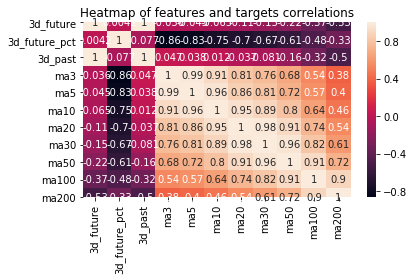

<Figure size 432x288 with 0 Axes>

In [46]:
sns.heatmap(corr, annot=True)
plt.yticks(rotation=0); plt.xticks(rotation=90)  # fix ticklabel directions
plt.title("Heatmap of features and targets correlations")
plt.tight_layout()  # fits plot area to the plot, "tightly"
plt.show()  # show the plot
plt.clf()  # clear the plot area

### Linear Model

In [47]:
# Import the statsmodels.api library with the alias sm
import statsmodels.api as sm

# Add a constant to the features
linear_features = sm.add_constant(features)

# Create a size for the training set that is 85% of the total number of samples
train_size = int(0.85 * features.shape[0])
train_features = linear_features[:train_size]
train_targets = targets[:train_size]
test_features = linear_features[train_size:]
test_targets = targets[train_size:]
print(linear_features.shape, train_features.shape, test_features.shape)

(1026, 11) (872, 11) (154, 11)


/Users/dangngochuy/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

lin_afd = LinearRegression()
lin_afd.fit(train_features, train_targets)

# Check the score on train and test
print(lin_afd.score(train_features, train_targets))
print(lin_afd.score(test_features, test_targets))

#Check Root mean squared error
lin_afd_pred = lin_afd.predict(test_features)
print(sqrt(mean_squared_error(lin_afd_pred, test_targets)))

0.9990367179629133
0.9877429870838967
0.06914275847649715


### Decision Tree

In [49]:
from sklearn.tree import DecisionTreeRegressor

# Create a decision tree regression model with default arguments
decision_tree_allen_afd = DecisionTreeRegressor(max_depth=3)

# Fit the model to the training features and targets
decision_tree_allen_afd.fit(train_features, train_targets)

# Check the score on train and test
print(decision_tree_allen_afd.score(train_features, train_targets))
print(decision_tree_allen_afd.score(test_features, test_targets))

#Check Root mean squared error
decision_tree_allen_afd_pred = decision_tree_allen_afd.predict(test_features)
print(sqrt(mean_squared_error(decision_tree_allen_afd_pred, test_targets)))

0.983467143980521
0.5803250544531041
0.40458604724411407


In [50]:
# Loop through a few different max depths and check the performance
for d in [3, 5, 10, 15, 20, 25]:
    # Create the tree and fit it
    decision_tree_allen_afd = DecisionTreeRegressor(max_depth=d)
    decision_tree_allen_afd.fit(train_features, train_targets)

    # Print out the scores on train and test
    print('max_depth=', str(d))
    print(decision_tree_allen_afd.score(train_features, train_targets))
    print(decision_tree_allen_afd.score(test_features, test_targets), '\n')

max_depth= 3
0.983467143980521
0.580325054453104 

max_depth= 5
0.9970019935814067
0.1143735817492898 

max_depth= 10
0.9999501271742073
0.1193456263956124 

max_depth= 15
0.9999996303872639
0.6336803302264921 

max_depth= 20
0.9999999999539702
-8.422636155932938 

max_depth= 25
0.9999999999539702
0.7199537375725591 



In [51]:
# Use the best max_depth of 3 from last exercise to fit a decision tree
decision_tree_allen_afd = DecisionTreeRegressor(max_depth=1)
decision_tree_allen_afd.fit(train_features, train_targets)

# Predict values for train and test
train_predictions = decision_tree_allen_afd.predict(train_features)
test_predictions = decision_tree_allen_afd.predict(test_features)

#Check Root mean squared error
decision_tree_allen_afd_pred = decision_tree_allen_afd.predict(test_features)
print(sqrt(mean_squared_error(decision_tree_allen_afd_pred, test_targets)))

2.400802605138095


### Random Forest

In [52]:
from sklearn.ensemble import RandomForestRegressor

# Create the random forest model and fit to the training data
rfr_allen_afd = RandomForestRegressor(n_estimators=50)
rfr_allen_afd.fit(train_features, train_targets)

# Look at the R^2 scores on train and test
print(rfr_allen_afd.score(train_features, train_targets))
print(rfr_allen_afd.score(test_features, test_targets))

# Check RMSE
rfr_allen_afd_pred = rfr_allen_afd.predict(test_features)
print(sqrt(mean_squared_error(rfr_allen_afd_pred, test_targets)))

0.9999556859081941
-0.8641263268079118
0.8526917282313387


In [53]:
from sklearn.model_selection import ParameterGrid

# Create a dictionary of hyperparameters to search
grid = {'n_estimators': [50,100,200,300], 'max_depth': [3], 'max_features': [4, 8], 'random_state': [42]}
test_scores = []

# Loop through the parameter grid, set the hyperparameters, and save the scores
for g in ParameterGrid(grid):
    rfr_allen_afd.set_params(**g)  # ** is "unpacking" the dictionary
    rfr_allen_afd.fit(train_features, train_targets)
    test_scores.append(rfr_allen_afd.score(test_features, test_targets))

# Find best hyperparameters from the test score and print
best_idx = np.argmax(test_scores)
print(test_scores[best_idx], ParameterGrid(grid)[best_idx])

-0.2247155752833072 {'random_state': 42, 'n_estimators': 50, 'max_features': 8, 'max_depth': 3}


0.9689373449551183
-0.45135390190501606
0.752386583159193


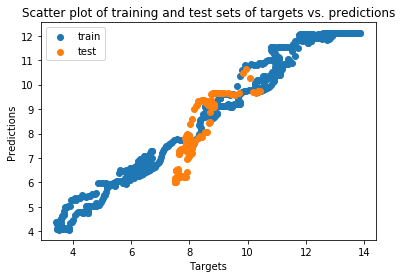

In [54]:
# Use the best hyperparameters from before to fit a random forest model
rfr_allen_afd = RandomForestRegressor(n_estimators=300, max_depth=3, max_features=4, random_state=42)
rfr_allen_afd.fit(train_features, train_targets)

# Make predictions with our model
train_predictions = rfr_allen_afd.predict(train_features)
test_predictions = rfr_allen_afd.predict(test_features)

# Look at the R^2 scores on train and test
print(rfr_allen_afd.score(train_features, train_targets))
print(rfr_allen_afd.score(test_features, test_targets))

# Check RMSE
rfr_allen_afd_pred = rfr_allen_afd.predict(test_features)
print(sqrt(mean_squared_error(rfr_allen_afd_pred, test_targets)))

# Create a scatter plot with train and test actual vs predictions
plt.scatter(train_targets, train_predictions, label='train')
plt.scatter(test_targets, test_predictions, label='test')
plt.title('Scatter plot of training and test sets of targets vs. predictions')
plt.xlabel('Targets')
plt.ylabel('Predictions')
plt.legend()
plt.show()

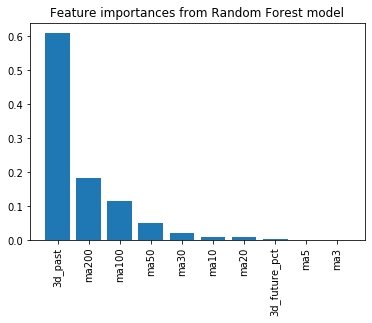

In [55]:
# Get feature importances from our random forest model
importances = rfr_allen_afd.feature_importances_
importances = importances[importances != 0]

# Get the index of importances from greatest importance to least
sorted_index = np.argsort(importances)[::-1]
x = range(len(importances))

# Create tick labels 
labels = np.array(feature_names)[sorted_index]
plt.bar(x, importances[sorted_index], tick_label=labels)

# Rotate tick labels to vertical
plt.xticks(rotation=90)
plt.title("Feature importances from Random Forest model")
plt.show()

### Gradient Boosting

In [56]:
# Gradient Boosting Model 
from sklearn.ensemble import GradientBoostingRegressor

# Create GB model
gbr_allen_afd = GradientBoostingRegressor(max_features=4,
                                learning_rate=0.01,
                                n_estimators=200,
                                subsample=0.6,
                                random_state=42)
result_gbr = gbr_allen_afd.fit(train_features, train_targets)

print(gbr_allen_afd.score(train_features, train_targets))
print(gbr_allen_afd.score(test_features, test_targets))

# Check RMSE
gbr_allen_afd_pred = gbr_allen_afd.predict(test_features)
print(sqrt(mean_squared_error(gbr_allen_afd_pred, test_targets)))

0.9604775380182657
0.48970255729896406
0.4461347743212106


### XGBoost

In [57]:
# XGBoost Model
from xgboost import XGBRegressor
import xgboost as xgb

# Create the xgboost model and fit to the training data

xgb_model_allen_afd = XGBRegressor(colsample_bytree = 0.7, learning_rate= 0.01, max_depth= 7, min_child_weight= 4, n_estimators= 500, nthread= 4, objective= 'reg:linear', silent= 1, subsample= 0.7)
result_xgb = xgb_model_allen_afd.fit(train_features, train_targets)

# Look at the R^2 scores on train and test
print(xgb_model_allen_afd.score(train_features, train_targets))
print(xgb_model_allen_afd.score(test_features, test_targets))

# Check RMSE
xgb_model_allen_afd_pred = xgb_model_allen_afd.predict(test_features)
print(sqrt(mean_squared_error(xgb_model_allen_afd_pred, test_targets)))

/Users/dangngochuy/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/dangngochuy/anaconda3/lib/python3.6/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


0.9989775180135163
-0.12059296357692095
0.6611170012243742


### Ensemble Model for AFD

In [58]:
from mlens.ensemble import SuperLearner

In [65]:
from sklearn.metrics import mean_squared_error

ensemble = SuperLearner(scorer=mean_squared_error, random_state=2019)

# Build the first layer
ensemble.add([RandomForestRegressor(n_estimators=50, max_depth=3, max_features=4, random_state=42), LinearRegression()])

# Build the second layer
ensemble.add([XGBRegressor(),
            GradientBoostingRegressor(n_estimators=200)])

# Attach the final meta estimator
ensemble.add_meta(DecisionTreeRegressor())

SuperLearner(array_check=None, backend=None, folds=2,
       layers=[Layer(backend='threading', dtype=<class 'numpy.float32'>, n_jobs=-1,
   name='layer-1', propagate_features=None, raise_on_exception=True,
   random_state=7240, shuffle=False,
   stack=[Group(backend='threading', dtype=<class 'numpy.float32'>,
   indexer=FoldIndex(X=None, folds=2, raise_on_ex...5f5bc80>)],
   n_jobs=-1, name='group-8', raise_on_exception=True, transformers=[])],
   verbose=0)],
       model_selection=False, n_jobs=None, raise_on_exception=True,
       random_state=2019, sample_size=20,
       scorer=<function mean_squared_error at 0x115f5bc80>, shuffle=False,
       verbose=False)

In [66]:
ensemble.fit(train_features, train_targets)
preds = ensemble.predict(test_features)
print("Fit data:\n%r" % ensemble.data)

/Users/dangngochuy/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/dangngochuy/anaconda3/lib/python3.6/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \
/Users/dangngochuy/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Fit data:
                                      score-m  score-s  ft-m  ft-s  pt-m  pt-s
layer-1  linearregression                0.08     0.02  0.02  0.01  0.00  0.00
layer-1  randomforestregressor          21.01     0.26  0.09  0.01  0.01  0.00
layer-2  gradientboostingregressor       9.57     7.77  0.17  0.00  0.00  0.00
layer-2  xgbregressor                    8.68     7.27  0.04  0.00  0.00  0.00



In [67]:
print("Prediction score: %.3f" % mean_squared_error(preds, test_targets))

Prediction score: 0.555


In [68]:
print(preds[-1])

9.500577


In [80]:
election_features = test_features.tail(1)

In [84]:
test_features

,const,3d_future_pct,3d_past,ma3,ma5,ma10,ma20,ma30,ma50,ma100,ma200
date,,,,,,,,,,,
2017-04-15,1.0,-0.009167,8.965986,1.003056,1.004736,1.004278,0.997381,1.014773,1.036880,1.163644,1.285015
2017-04-16,1.0,-0.009195,8.959184,1.003065,1.005670,1.007356,0.999483,1.015746,1.038284,1.162615,1.286228
2017-04-17,1.0,-0.006918,8.931973,1.003075,1.006149,1.009685,1.002056,1.016595,1.039589,1.161569,1.287485
2017-04-18,1.0,-0.002313,8.904762,1.003084,1.006168,1.011334,1.005069,1.017395,1.040793,1.160493,1.288786
2017-04-19,1.0,0.002320,8.877551,1.003094,1.006187,1.012529,1.008159,1.018147,1.041894,1.159386,1.290132
2017-04-20,1.0,0.004644,8.850340,1.001548,1.004334,1.011146,1.009094,1.016601,1.040518,1.155613,1.288513
2017-04-21,1.0,0.004637,8.823129,0.999227,1.001082,1.007651,1.007979,1.012839,1.036806,1.149217,1.283945
2017-04-22,1.0,0.004630,8.795918,0.998457,0.998765,1.004398,1.006925,1.009382,1.033182,1.142917,1.279428
2017-04-23,1.0,0.002833,8.789116,0.998459,0.997381,1.001387,1.005932,1.006203,1.029645,1.136713,1.274961


In [83]:
election_features

,const,3d_future_pct,3d_past,ma3,ma5,ma10,ma20,ma30,ma50,ma100,ma200
date,,,,,,,,,,,
2017-09-15,1.0,0.023523,9.825746,0.989151,0.977233,0.947005,0.907729,0.880542,0.842923,0.801867,0.831441


In [74]:
election_preds = ensemble.predict(election_features)
print(election_preds)

ValueError: Number of splits 2 is greater than the number of samples: 1.